In [13]:
def readfile_to_list(path):
    # 打开文件
    with open(path, 'r') as file:
        # 读取每一行并转换为整数
        numbers = [float(line.strip()) for line in file.readlines()]
    
    return numbers

In [14]:
AC_return_list = readfile_to_list('./AC_return_list.txt')
DQN_return_list = readfile_to_list('./DQN_return_list.csv')
PPO_return_list = readfile_to_list('./PPO_return_list.txt')

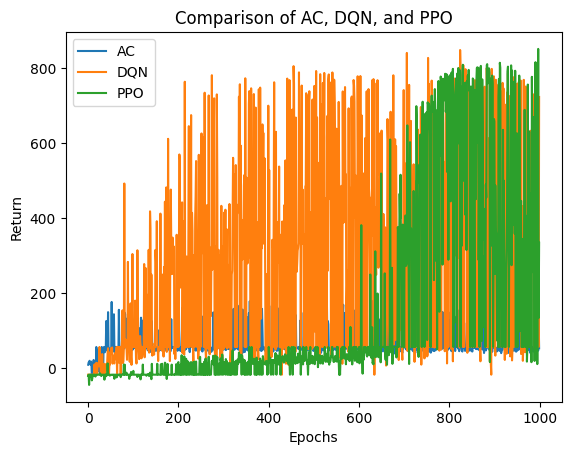

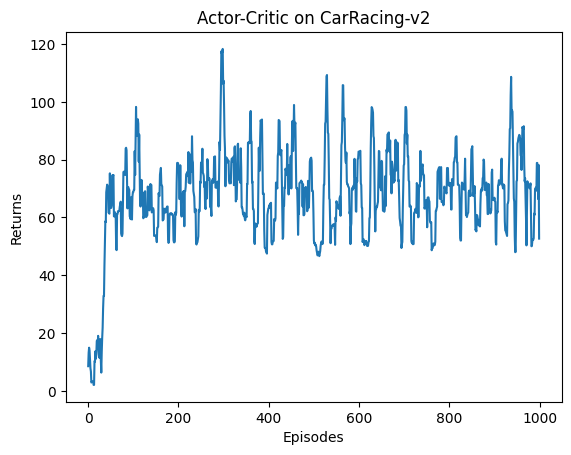

In [16]:
import matplotlib.pyplot as plt

# 假设你的列表已经按照前面的方法读取
# AC_return_list, DQN_return_list, PPO_return_list

# 绘制每个列表
plt.plot(AC_return_list, label='AC')
plt.plot(DQN_return_list, label='DQN')
plt.plot(PPO_return_list, label='PPO')

# 添加图例
plt.legend()

# 添加标题和轴标签（可选）
plt.title('Comparison of AC, DQN, and PPO')
plt.xlabel('Epochs')
plt.ylabel('Return')

# 显示图表
plt.show()


mv_return = moving_average(AC_return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Actor-Critic on {}'.format("CarRacing-v2"))
plt.savefig("figure2.png", dpi=300)
plt.show()
